In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# !pip install tensorflow

In [3]:
pwd

'C:\\Users\\Gajendra\\Documents\\Week 2'

In [2]:
import random
import math

In [8]:
# refer -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [4]:
data = tf.keras.utils.image_dataset_from_directory(
"C:\\Users\\Gajendra\\Documents\\Week 2\\homer_bart", batch_size=32, image_size=(64,64))

Found 269 files belonging to 2 classes.


In [5]:
len(data) # 9 batches

9

In [7]:
train_size = int(0.9 * len(data))
test_size = len(data) - train_size

train_size, test_size

(8, 1)

In [9]:
data = data.map(lambda x,y : (x / 255., y))

In [10]:
data_it = data.as_numpy_iterator()

In [11]:
batch = data_it.next()

In [22]:
batch[0].shape

(32, 64, 64, 3)

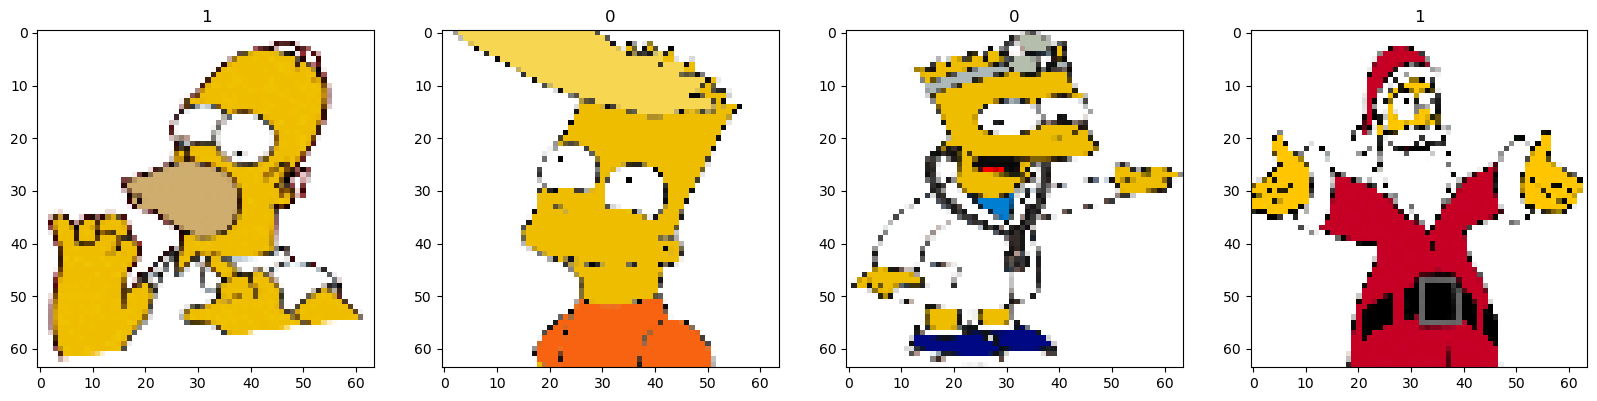

In [27]:
# we are plotting first 4 images from the batch of 32 

fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(batch[1][i])

In [28]:
x_train = data.take(train_size)
x_test = data.skip(train_size).take(test_size)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(64, 64, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [32]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['Accuracy'])

In [33]:
model.fit(x_train, epochs=40)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Accuracy: 0.4795 - loss: 2.8654
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - Accuracy: 0.6318 - loss: 0.6932
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - Accuracy: 0.6058 - loss: 0.6338
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - Accuracy: 0.7592 - loss: 0.5284
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - Accuracy: 0.7757 - loss: 0.4908
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - Accuracy: 0.7671 - loss: 0.4772
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - Accuracy: 0.8097 - loss: 0.4415
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - Accuracy: 0.8095 - loss: 0.3937
Epoch 9/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - Accuracy: 0.7875 - loss: 0.4299
Epoch 10/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - Accuracy: 0.8081 - loss: 0.4260
Epoch 11/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - Accuracy: 0.8478 - loss: 0.3517
Epoch 12/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - Accuracy: 0.8540 - loss: 0.3516
E

In [34]:
loss, accuracy = model.evaluate(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - Accuracy: 1.0000 - loss: 0.0512
